In [1]:
import pandas
import numpy
import matplotlib.pyplot as plotter
from pathlib import Path
import seaborn
from scipy.signal import *
from scipy.stats import probplot

In [2]:
data = Path("../data/summer_proc_data/")
files = list(data.iterdir())
print(files)

[PosixPath('../data/summer_proc_data/summer_proc_disk.csv'), PosixPath('../data/summer_proc_data/summer_proc_voltage.csv'), PosixPath('../data/summer_proc_data/summer_proc_power.csv'), PosixPath('../data/summer_proc_data/summer_proc_tx.csv'), PosixPath('../data/summer_proc_data/summer_proc_cpu.csv'), PosixPath('../data/summer_proc_data/summer_proc_rx.csv')]


In [3]:
disk = pandas.read_csv(str(data/"summer_proc_disk.csv")).drop("Unnamed: 0", axis=1)
print(disk.columns)
cpu = pandas.read_csv(str(data/"summer_proc_cpu.csv")).drop("Unnamed: 0", axis=1)
print(cpu.columns)
power = pandas.read_csv(str(data/"summer_proc_power.csv")).drop("Unnamed: 0", axis=1)
# context = pandas.read_csv(str(data/"summer_simple_context.csv")).drop("Unnamed: 0", axis=1)
tx = pandas.read_csv(str(data/"summer_proc_tx.csv")).drop("Unnamed: 0", axis=1)
rx = pandas.read_csv(str(data/"summer_proc_rx.csv")).drop("Unnamed: 0", axis=1)

Index(['Time', 'disk_p2'], dtype='object')
Index(['Time', 'CPU_user'], dtype='object')


----

# Visualize and get info on data

In [4]:
time = power["Time"]
power = power.drop("Time", axis=1)
#power = medfilt(power.as_matrix().ravel(), 21)
power = pandas.DataFrame(power.as_matrix().ravel(), columns=["power"])
power.head()

,power
0,1450.609756
1,1450.609756
2,1331.707317
3,1427.642276
4,1384.756098


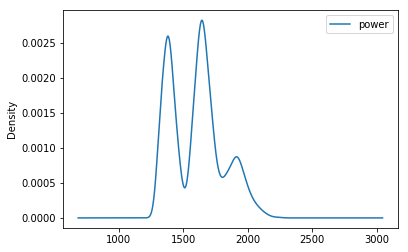

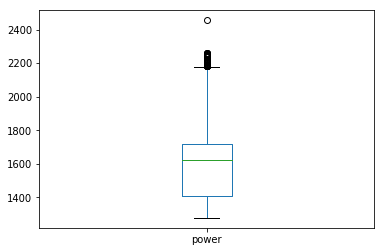

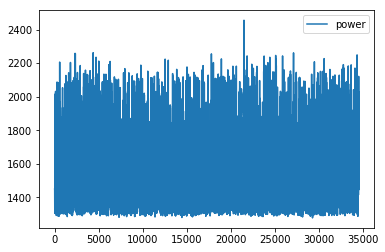

In [5]:
power.plot(kind="density")
plotter.show()
power.plot(kind="box")
plotter.show()
power.plot()
plotter.show()

In [6]:
cpu

,Time,CPU_user
0,2018-07-10 18:30:05+00:00,10.000000
1,2018-07-10 18:30:05+00:00,10.000000
2,2018-07-10 18:30:10+00:00,8.000000
3,2018-07-10 18:30:15+00:00,12.000000
4,2018-07-10 18:30:20+00:00,9.500000
5,2018-07-10 18:30:25+00:00,7.000000
6,2018-07-10 18:30:30+00:00,13.166667
7,2018-07-10 18:30:35+00:00,12.333333
8,2018-07-10 18:30:40+00:00,8.000000
9,2018-07-10 18:30:45+00:00,13.333333


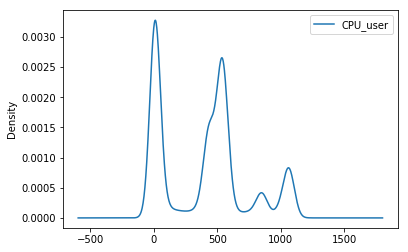

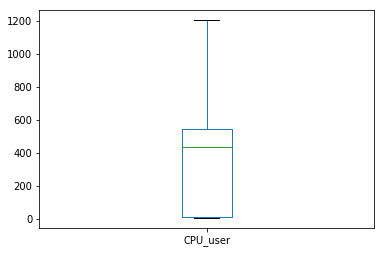

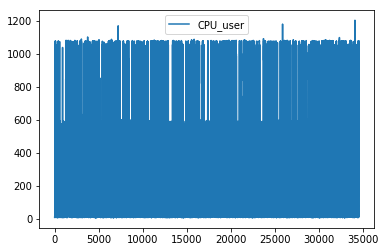

In [7]:
cpu.plot(kind="density")
plotter.show()
cpu.plot(kind="box")
plotter.show()
cpu.plot()
plotter.show()

In [8]:
#disk = disk.drop(disk.columns[2], axis=1)
disk.describe()

,disk_p2
count,34560.000000
mean,229.147859
std,486.386083
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3900.000000


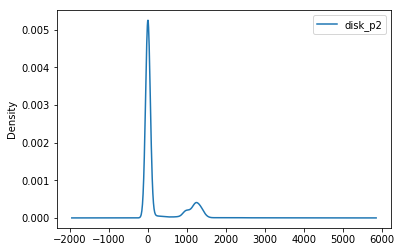

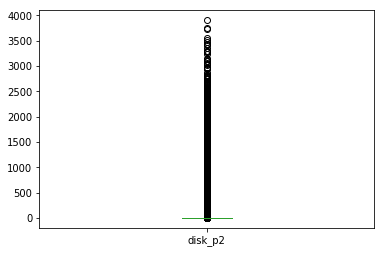

In [9]:
disk.plot(kind="density")
plotter.show()
disk.plot(kind="box")
plotter.show()

In [10]:
tx.describe()

,net_TX
count,34560.000000
mean,76.361343
std,58.354279
min,12.000000
25%,15.000000
50%,78.000000
75%,97.500000
max,251.000000


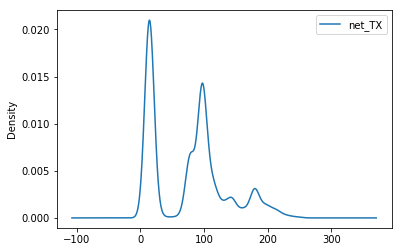

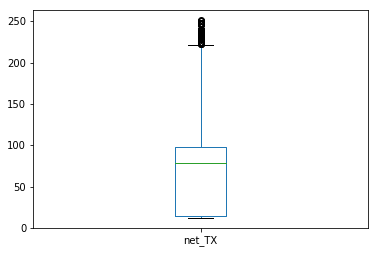

In [11]:
tx.plot(kind="density")
plotter.show()
tx.plot(kind="box")
plotter.show()

In [12]:
rx.describe()

,net_RX
count,34560.000000
mean,9.475424
std,1.213157
min,8.000000
25%,8.000000
50%,10.000000
75%,10.000000
max,52.666667


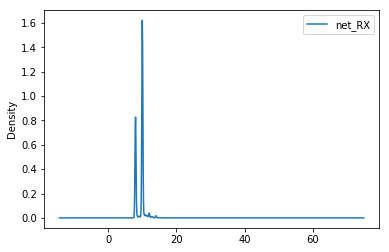

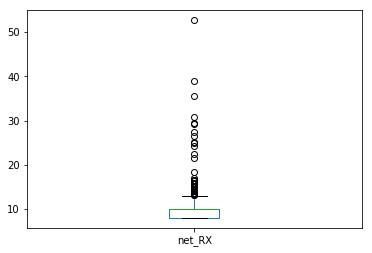

In [13]:
rx.plot(kind="density")
plotter.show()
rx.plot(kind="box")
plotter.show()

In [14]:
all_data = pandas.concat([cpu, tx, rx, disk, power], axis=1, join="inner").drop("Time", axis=1).fillna(0)
all_data.describe()

,CPU_user,net_TX,net_RX,disk_p2,power
count,34560.000000,34560.000000,34560.000000,34560.000000,34560.000000
mean,396.757533,76.361343,9.475424,229.147859,1604.634287
std,337.801514,58.354279,1.213157,486.386083,202.190383
min,5.000000,12.000000,8.000000,0.000000,1276.829268
25%,13.000000,15.000000,8.000000,0.000000,1407.926829
50%,436.000000,78.000000,10.000000,0.000000,1619.715447
75%,544.166667,97.500000,10.000000,0.000000,1716.463415
max,1202.166667,251.000000,52.666667,3900.000000,2455.487805


In [15]:
all_data

,CPU_user,net_TX,net_RX,disk_p2,power
0,10.000000,78.0,8.0,0.000000,1450.609756
1,10.000000,78.0,8.0,0.000000,1450.609756
2,8.000000,111.0,8.0,0.000000,1331.707317
3,12.000000,97.5,10.0,0.000000,1427.642276
4,9.500000,97.5,10.0,0.000000,1384.756098
5,7.000000,78.0,8.5,0.000000,1313.414634
6,13.166667,97.5,10.5,0.000000,1357.723577
7,12.333333,114.5,10.5,0.000000,1400.000000
8,8.000000,95.0,8.5,0.000000,1316.463415
9,13.333333,97.5,10.0,0.000000,1395.934959


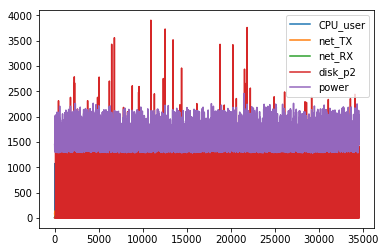

In [16]:
all_data.plot()
plotter.show()

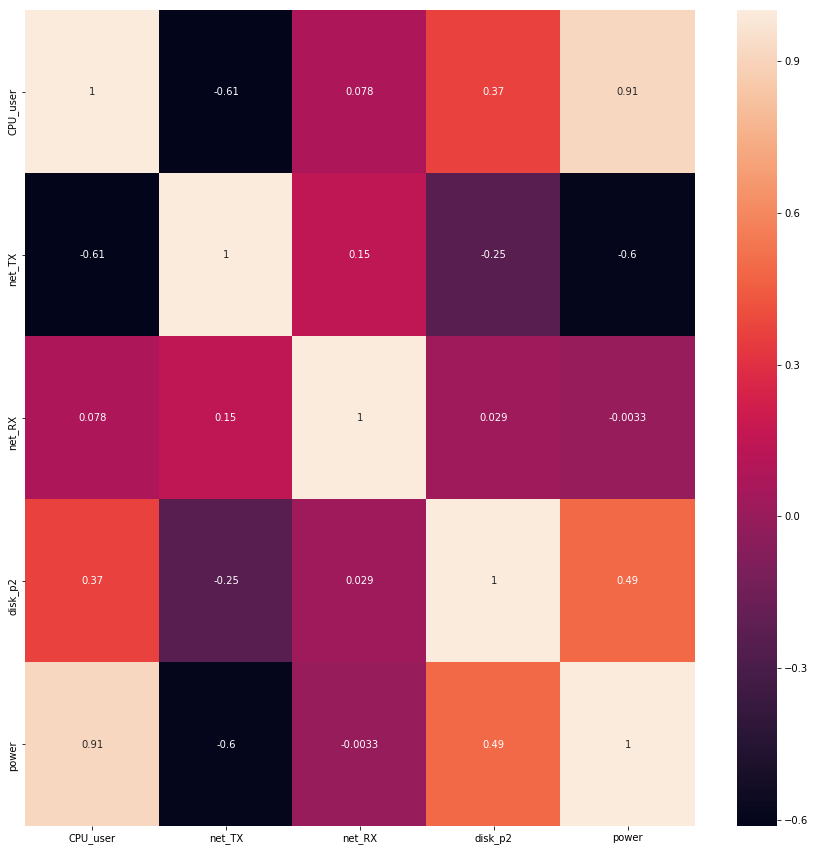

In [17]:
plotter.figure(figsize=(15,15))
seaborn.heatmap(all_data.corr(), annot=True)
plotter.show()

## Define data loader

In [18]:
class DataLoader:
    """
        Defines data loader for seq2point model.
    """
    
    def __init__(self, X, y, window=5):
        self.X = X
        self.y = y
        self.window = window
        
    def __len__(self):
        return (self.X.shape[0]-(self.window + 1))
    
    def __getitem__(self, i):
        """
            Returns single batch of data in flat seq2point compatible format.
        """
        X = self.X[i: i+self.window, :]
        # y = self.y[i+int(self.window/2)]
        y = self.y[i+self.window]
        
        return (X, y)


class BatchLoader:
    """
        Creates batches from data provided by dataloader.
    """
    
    def __init__(self, dataloader, batch_size=32):
        self.dloader = dataloader
        self.batch_size = batch_size
        self.samples = list(range(len(self.dloader)))
        
    def __len__(self):
        return int(len(self.dloader)/self.batch_size) - 1
        
    def __getitem__(self, i):
        i = i*self.batch_size
        _samples = self.samples[i: i+self.batch_size]
        
        X=[]
        y=[]
        
        for j in range(len(_samples)):
            _X, _y = self.dloader[_samples[j]]
            X.append(_X.ravel())
            y.append(_y)
        
        return numpy.array(X), numpy.array(y)

In [19]:
class ConvBatchLoader:
    """
        Creates conv batches from data provided by dataloader.
    """
    
    def __init__(self, dataloader, batch_size=32):
        self.dloader = dataloader
        self.batch_size = batch_size
        self.samples = list(range(len(self.dloader)))
        
    def __len__(self):
        return int(len(self.dloader)/self.batch_size) - 1
        
    def __getitem__(self, i):
        i = i*self.batch_size
        _samples = self.samples[i: i+self.batch_size]
        
        X=[]
        y=[]
        
        for j in range(len(_samples)):
            _X, _y = self.dloader[_samples[j]]
            X.append(_X)
            y.append(_y)
        
        return numpy.array(X), numpy.array(y)

In [20]:
def run_thresholding(data):
        arr = pandas.Series(data)
        mean = 0
        count = 0
        outliers = numpy.zeros_like(arr)
        thres = numpy.zeros_like(arr)
        means = numpy.zeros_like(arr)
        cmeans = arr.expanding().mean()
        std = 0

        # Compute running stats

        m2 = 0
        for i in range(len(arr)):

            if i > 100 and arr[i] > (mean + 4 * std):
                outliers[i] = data[i]
                means[i] = mean
                thres[i] = mean + (4 * std)
                continue

            count = count + 1
            delta = arr[i] - mean

            mean = mean + (delta/count)
            means[i] = mean

            new_delta = arr[i] - mean
            m2 = m2 + delta * new_delta

            std = numpy.sqrt(m2 / count)

            thres[i] = mean + (4 * std)
            
        return thres, outliers

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = all_data.columns

all_data = pandas.DataFrame(scaler.fit_transform(all_data.as_matrix()), columns=columns)

y = all_data["power"]
X = all_data.drop("power", axis=1)

print(X.head())
print(y.head())

   CPU_user    net_TX    net_RX  disk_p2
0  0.004177  0.276151  0.000000      0.0
1  0.004177  0.276151  0.000000      0.0
2  0.002506  0.414226  0.000000      0.0
3  0.005847  0.357741  0.044776      0.0
4  0.003759  0.357741  0.044776      0.0
0    0.147439
1    0.147439
2    0.046560
3    0.127953
4    0.091568
Name: power, dtype: float64


In [22]:
all_data.shape

(34560, 5)

In [23]:
def data_gen(loader):
    while 1:
        for i in range(len(loader)):
            yield loader[i]

### Deep

In [24]:
from keras.layers import Conv1D, Input, Dense, Flatten, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error

/home/adityas/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
y = all_data["power"]
X = all_data.drop("power", axis=1)

In [26]:
bloader = ConvBatchLoader(dataloader=DataLoader(X=X[:25000].as_matrix(), y=y[:25000].as_matrix(), window=51), batch_size=64)
vloader = ConvBatchLoader(dataloader=DataLoader(X=X[25000:30000].as_matrix(), y=y[25000:30000].as_matrix(), window=51), batch_size=5000)

In [27]:
tloader = data_gen(bloader)

In [28]:
_input = Input(shape=(51, 4))
conv = Conv1D(kernel_size=10, filters=20, activation="relu")(_input)
conv = Conv1D(kernel_size=10, filters=10, activation="relu")(conv)
conv = MaxPooling1D(pool_size=2)(conv)
conv = Conv1D(kernel_size=5, filters=10, activation="relu")(conv)
conv = MaxPooling1D(pool_size=2)(conv)
conv = Conv1D(kernel_size=5, filters=10, activation="sigmoid")(conv)
flat = Flatten()(conv)
out = Dense(1, activation="sigmoid")(flat)

In [29]:
model = Model(inputs=_input, outputs=out)
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])
estopper = EarlyStopping(monitor="val_loss", patience=10)
model.fit_generator(callbacks=[estopper], generator=tloader, validation_data=vloader[0], shuffle=True, steps_per_epoch=500, epochs=100)

Epoch 1/100
500/500 [==============================] - 4s 8ms/step - loss: 0.0180 - mean_absolute_error: 0.1087 - val_loss: 0.0130 - val_mean_absolute_error: 0.0904
Epoch 2/100
500/500 [==============================] - 4s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0905 - val_loss: 0.0111 - val_mean_absolute_error: 0.0820
Epoch 3/100
500/500 [==============================] - 4s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0833 - val_loss: 0.0098 - val_mean_absolute_error: 0.0759
Epoch 4/100
500/500 [==============================] - 4s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0769 - val_loss: 0.0089 - val_mean_absolute_error: 0.0724
Epoch 5/100
500/500 [==============================] - 4s 8ms/step - loss: 0.0090 - mean_absolute_error: 0.0721 - val_loss: 0.0081 - val_mean_absolute_error: 0.0674
Epoch 6/100
500/500 [==============================] - 4s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0687 - val_loss: 0.0076 - val_mean_absolute_error: 0.0651
Epoch 7/10

In [30]:
bloader = ConvBatchLoader(dataloader=DataLoader(X=X[30000:].as_matrix(), y=y[30000:].as_matrix(), window=51), batch_size=4000)

In [31]:
X, y = bloader[0]
print(X.shape)
print(y.shape)

pred = model.predict(X).ravel()


(4000, 51, 4)
(4000,)


(4000,)
0.05841260445334843


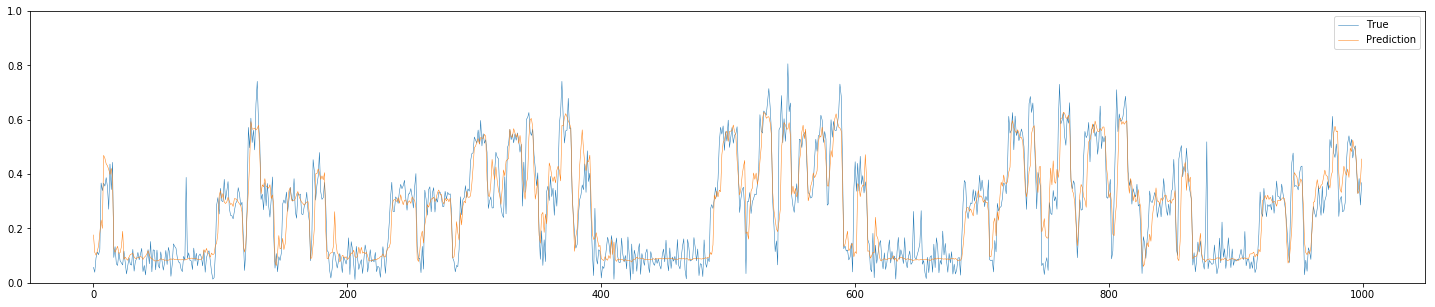

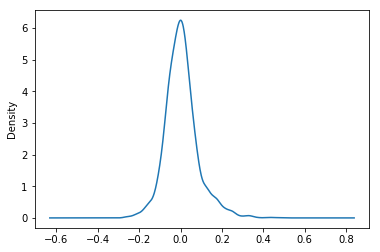

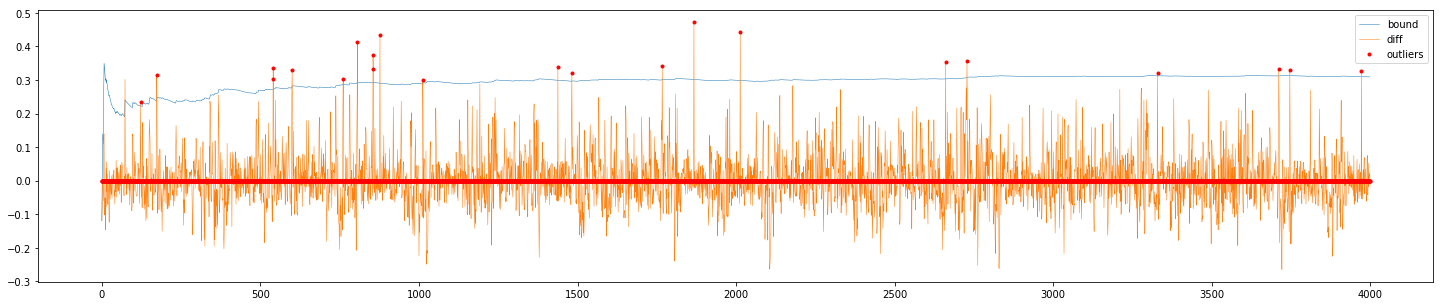

In [32]:
print(pred.shape)
print(mean_absolute_error(y_true=y, y_pred=model.predict(X)))
fig = plotter.figure(figsize=(25,5))
plotter.plot(y[:1000], linewidth=0.5, label="True")
plotter.plot(pred[:1000], linewidth=0.5, label="Prediction")
plotter.ylim(0,1)
plotter.legend()
plotter.show()

diff = y - pred

pandas.Series(diff).plot(kind="density")
plotter.show()

bound, out = run_thresholding(diff)
fig = plotter.figure(figsize=(25,5))
plotter.plot(bound, linewidth=0.5, label="bound")
plotter.plot(diff, linewidth=0.5, label="diff")
plotter.plot(out, 'r.', linewidth=0.5, label="outliers")
#plotter.plot(mean - (3*std), linewidth=0.5, label="Lower bound")
plotter.legend()
plotter.show()

## Make test set

In [33]:
data = Path("../data/summer_proc_test/")
files = list(data.iterdir())
print(files)

[PosixPath('../data/summer_proc_test/summer_proc_test_cpu.csv'), PosixPath('../data/summer_proc_test/summer_proc_test_tx.csv'), PosixPath('../data/summer_proc_test/summer_proc_test_rx.csv'), PosixPath('../data/summer_proc_test/summer_proc_test_voltage.csv'), PosixPath('../data/summer_proc_test/summer_proc_test_power.csv'), PosixPath('../data/summer_proc_test/summer_proc_test_disk.csv')]


In [34]:
disk = pandas.read_csv(str(data/"summer_proc_test_disk.csv")).drop("Unnamed: 0", axis=1)
cpu = pandas.read_csv(str(data/"summer_proc_test_cpu.csv")).drop("Unnamed: 0", axis=1)
power = pandas.read_csv(str(data/"summer_proc_test_power.csv")).drop("Unnamed: 0", axis=1).fillna(0)
tx = pandas.read_csv(str(data/"summer_proc_test_tx.csv")).drop("Unnamed: 0", axis=1)
rx = pandas.read_csv(str(data/"summer_proc_test_rx.csv")).drop("Unnamed: 0", axis=1)

In [35]:
power = power.drop("Time", axis=1)
power = pandas.DataFrame(power.as_matrix().ravel(), columns=["power"])
power.head()

,power
0,1381.097561
1,1381.097561
2,1591.056911
3,1598.170732
4,1591.463415


In [36]:
test_data = pandas.concat([cpu, tx, rx, disk, power], axis=1, join="inner").drop("Time", axis=1).fillna(0)
test_data.describe()

,CPU_user,net_TX,net_RX,disk_p2,power
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,503.303935,264.406250,211.630556,222.303241,1804.014651
std,399.552048,599.688124,606.191497,484.812885,332.300303
min,6.000000,12.000000,8.000000,0.000000,1286.585366
25%,13.666667,15.000000,8.000000,0.000000,1504.878049
50%,524.750000,20.000000,10.000000,0.000000,1784.756098
75%,879.875000,144.000000,10.500000,3.333333,2008.180894
max,1126.500000,2676.500000,2672.500000,3405.000000,2684.146341


In [37]:
columns = test_data.columns

test_data = pandas.DataFrame(scaler.transform(test_data.as_matrix()), columns=columns)

y = test_data["power"]
X = test_data.drop("power", axis=1)

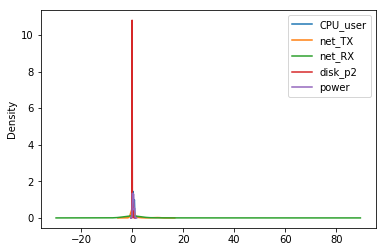

In [38]:
test_data.plot(kind="density")
plotter.show()

In [39]:
bloader = ConvBatchLoader(dataloader=DataLoader(X=X.as_matrix(), y=y.as_matrix(), window=51), batch_size=4000)

In [40]:
X, y = bloader[0]
print(X.shape)
print(y.shape)

pred = model.predict(X).ravel()


(1388, 51, 4)
(1388,)


(1388,)
0.19139198053494857


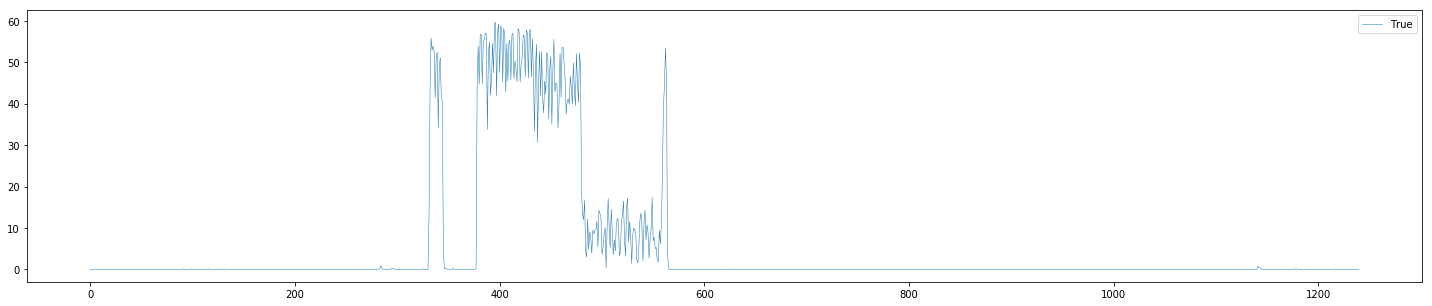

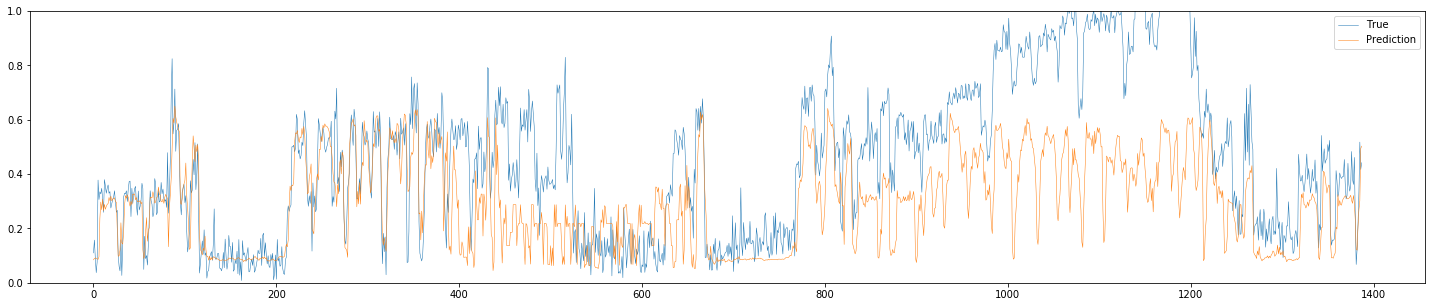

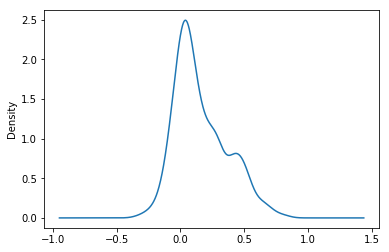

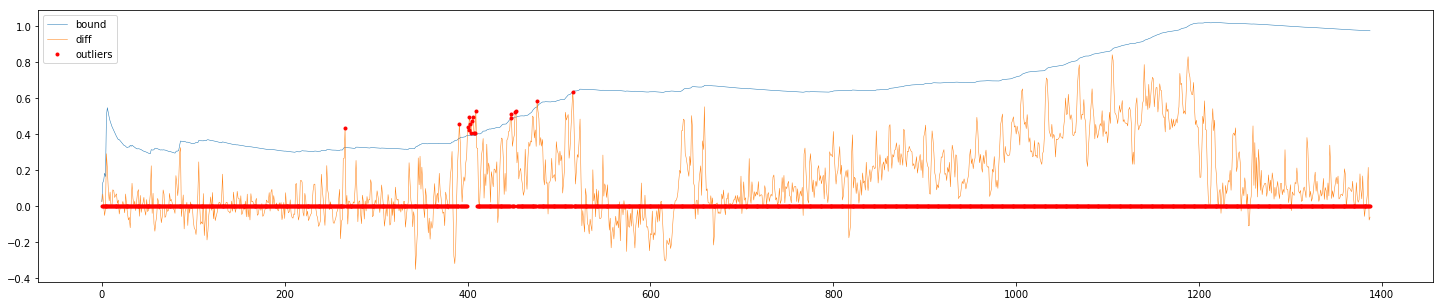

In [41]:
print(pred.shape)
print(mean_absolute_error(y_true=y, y_pred=model.predict(X)))

fig = plotter.figure(figsize=(25,5))
plotter.plot(test_data["net_RX"].as_matrix()[100:-100], linewidth=0.5, label="True")
plotter.legend()
plotter.show()

fig = plotter.figure(figsize=(25,5))
plotter.plot(y, linewidth=0.5, label="True")
plotter.plot(pred, linewidth=0.5, label="Prediction")
plotter.ylim(0,1)
plotter.legend()
plotter.show()

diff = y - pred

pandas.Series(diff).plot(kind="density")
plotter.show()

bound, out = run_thresholding(diff)
fig = plotter.figure(figsize=(25,5))
plotter.plot(bound, linewidth=0.5, label="bound")
plotter.plot(diff, linewidth=0.5, label="diff")
plotter.plot(out, 'r.', linewidth=0.5, label="outliers")
#plotter.plot(mean - (3*std), linewidth=0.5, label="Lower bound")
plotter.legend()
plotter.show()